C:\Users\Nur Izfarwiza\AppData\Local\Temp\ipykernel_35404\2770264383.py:12: RuntimeWarning: invalid value encountered in cast
  times = ds.variables['time'][:]  # in hours since 2019-12-20 00:00:00
C:\Users\Nur Izfarwiza\AppData\Local\Temp\ipykernel_35404\2770264383.py:12: UserWarning: WARNING: valid_range not used since it
cannot be safely cast to variable data type
  times = ds.variables['time'][:]  # in hours since 2019-12-20 00:00:00


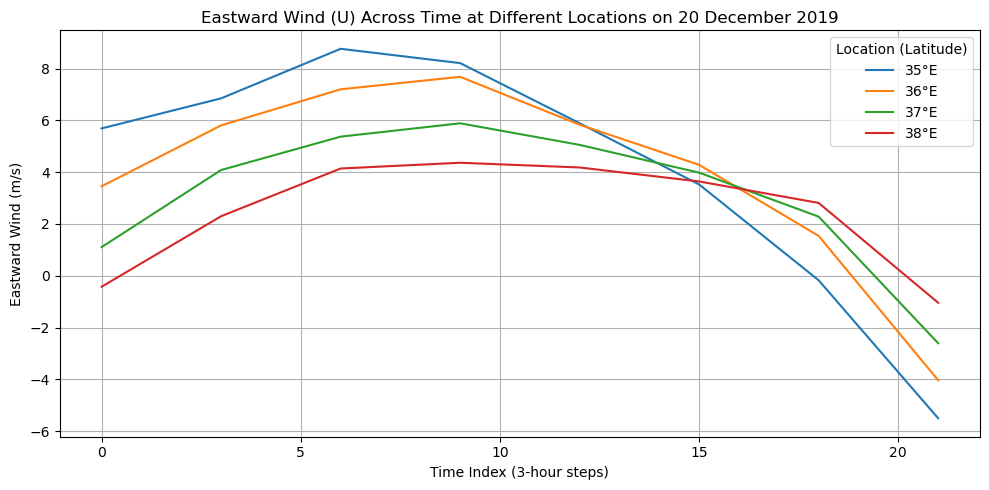

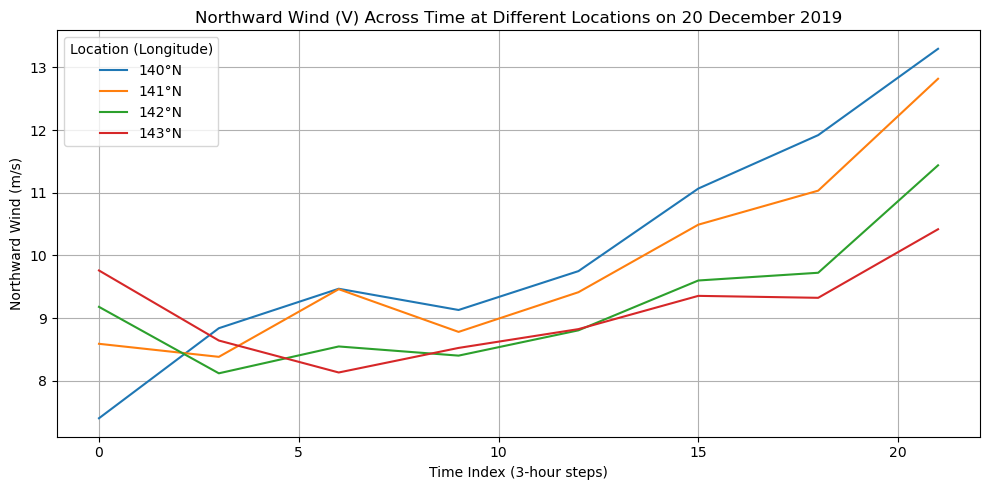

In [9]:
from netCDF4 import Dataset
import numpy as np
import matplotlib.pyplot as plt

# Load the NetCDF dataset
file_path = rf"C:\Users\Nur Izfarwiza\Documents\Dissertation\Wind/MERRA2_400.tavg3_3d_asm_Nv.20191220.nc4"
ds = Dataset(file_path)

# Extract dimensions
lats = ds.variables['lat'][:]
lons = ds.variables['lon'][:]
times = ds.variables['time'][:]  # in hours since 2019-12-20 00:00:00
U = ds.variables['U'][:]  # shape (time, level, lat, lon)
V = ds.variables['V'][:]  # shape (time, level, lat, lon)

# Fixed layer range
layer_range = range(56, 68)

# Select 4 nearby points for comparison
# We'll choose mid-range lat/lon indices
lat_indices = [-35, -34, -33, -32]
lon_indices = [140, 141, 142, 143]

# Store mean wind across selected layers at each (lat, lon) for each time
u_series = {}
v_series = {}

for i, (lat_idx, lon_idx) in enumerate(zip(lat_indices, lon_indices)):
    u_vals = np.mean(U[:, layer_range, lat_idx, lon_idx], axis=1)
    v_vals = np.mean(V[:, layer_range, lat_idx, lon_idx], axis=1)
    u_series[f'{i+35}°E'] = u_vals
    v_series[f'{i+140}°N'] = v_vals

# Plot eastward wind component over time
plt.figure(figsize=(10, 5))
for key, vals in u_series.items():
    plt.plot(times/60, vals, label=key)
plt.title("Eastward Wind (U) Across Time at Different Locations on 20 December 2019")
plt.xlabel("Time Index (3-hour steps)")
plt.ylabel("Eastward Wind (m/s)")
plt.legend(title="Location (Latitude)")
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot northward wind component over time
plt.figure(figsize=(10, 5))
for key, vals in v_series.items():
    plt.plot(times / 60, vals, label=key)
plt.title("Northward Wind (V) Across Time at Different Locations on 20 December 2019")
plt.xlabel("Time Index (3-hour steps)")
plt.ylabel("Northward Wind (m/s)")
plt.legend(title="Location (Longitude)")
plt.grid(True)
plt.tight_layout()
plt.show()
